# Single-Task Learning on Cifar10 Dataset (2 Classes): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 2-classes image classification on Cifar10.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 2           # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

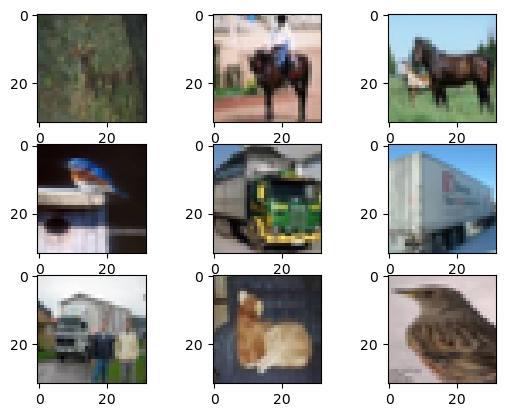

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Creating Superclasses
The super-classes are divided into animals and vehicles:
- **Animals**: Bird, Cat, Deer, Dog, Frog, Horse. (5000x6 training images, 1000x6 testing images).
- **Vehicles**: Airplane, Automotive, Ship, Truck. (5000x4 training images, 1000x4 testing images).

From [Cifar 10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html), we know that the labels have the corresponding label number:
- Airplane: 0.
- Automobile: 1.
- Bird: 2.
- Cat: 3.
- Deer: 4.
- Dog: 5.
- Frog: 6.
- Horse: 7.
- Ship: 8.
- Truck 9.

In [6]:
# define superclasses (0 = animal, 1 = vehicle)
animal_classes = [2, 3, 4, 5, 6, 7]
y_train = [0 if y in animal_classes else 1 for y in y_train ] 
y_test = [0 if y in animal_classes else 1 for y in y_test]

print(len(y_train))
print(len(y_test))

50000
10000


In [7]:
# check labels for accuracy (referencing image plotted above)
print(y_train[10:19])

[0, 0, 0, 0, 1, 1, 1, 0, 0]


## 1.3. Data Preprocessing

In [8]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
# reshape y_train and y_test match shape of X_train and X_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(50000, 2)
(10000, 2)


# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [10]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               3

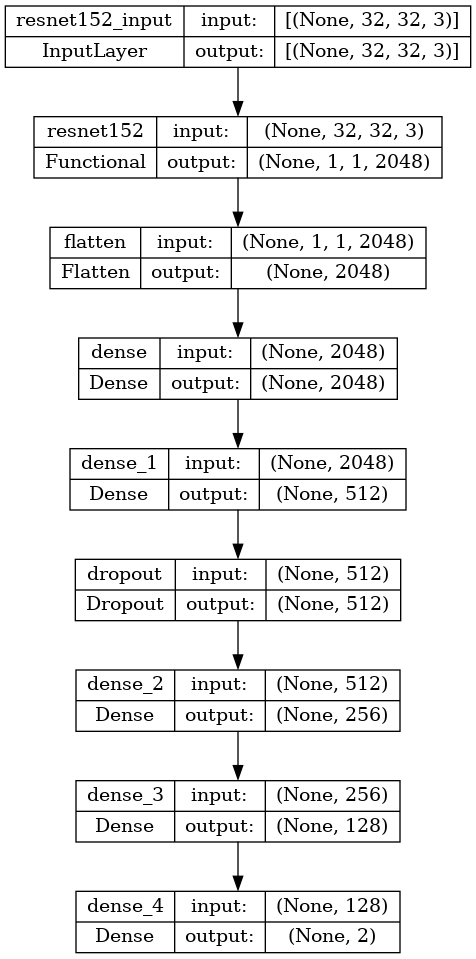

In [11]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 128, Dropout = 0, Optimizer = Adam)


In [13]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [14]:
# compile model
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [15]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
391/391 [==============================] - 167s 152ms/step - loss: 0.3711 - accuracy: 0.8408 - val_loss: 0.2432 - val_accuracy: 0.9014
Epoch 2/20
391/391 [==============================] - 54s 137ms/step - loss: 0.2284 - accuracy: 0.9065 - val_loss: 0.2276 - val_accuracy: 0.9127
Epoch 3/20
391/391 [==============================] - 56s 143ms/step - loss: 0.2418 - accuracy: 0.9034 - val_loss: 3.2373 - val_accuracy: 0.8318
Epoch 4/20
391/391 [==============================] - 56s 143ms/step - loss: 0.2442 - accuracy: 0.9024 - val_loss: 0.2298 - val_accuracy: 0.9084
Epoch 5/20
391/391 [==============================] - 54s 138ms/step - loss: 0.2015 - accuracy: 0.9209 - val_loss: 0.2033 - val_accuracy: 0.9185
Epoch 6/20
391/391 [==============================] - 56s 143ms/step - loss: 0.1799 - accuracy: 0.9304 - val_loss: 0.2175 - val_accuracy: 0.9252
Epoch 7/20
391/391 [==============================] - 54s 138ms/step - loss: 0.1554 - accuracy: 0.9399 - val_loss: 0.1968 - val_a

In [16]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.1606293022632599
Train Acc: 0.938040018081665

Test Loss: 0.22481203079223633
Test Acc: 0.9190999865531921


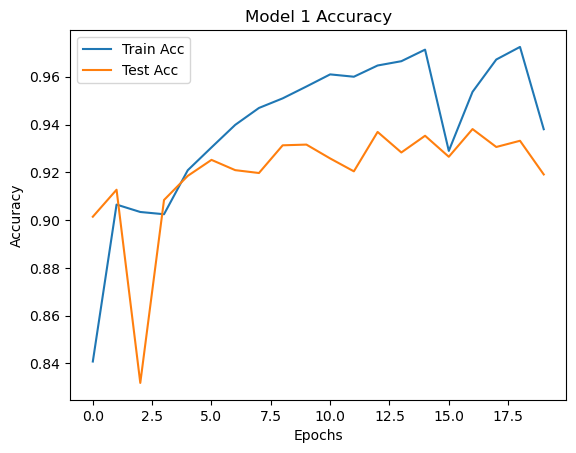

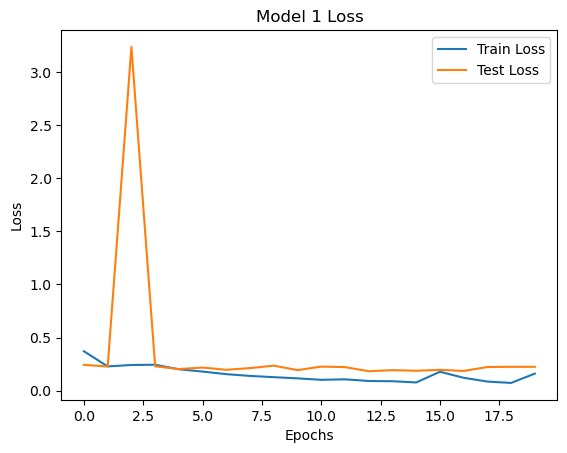

In [17]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 64, Dropout = 0, Optimizer = Adam)

In [18]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [19]:
# compile model
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [20]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
782/782 [==============================] - 205s 131ms/step - loss: 0.3744 - accuracy: 0.8443 - val_loss: 0.6275 - val_accuracy: 0.8842
Epoch 2/20
782/782 [==============================] - 100s 128ms/step - loss: 0.2545 - accuracy: 0.8992 - val_loss: 0.4166 - val_accuracy: 0.8948
Epoch 3/20
782/782 [==============================] - 105s 134ms/step - loss: 0.2133 - accuracy: 0.9165 - val_loss: 0.3435 - val_accuracy: 0.9158
Epoch 4/20
782/782 [==============================] - 105s 134ms/step - loss: 0.1973 - accuracy: 0.9231 - val_loss: 0.2152 - val_accuracy: 0.9092
Epoch 5/20
782/782 [==============================] - 105s 134ms/step - loss: 0.1756 - accuracy: 0.9316 - val_loss: 0.1986 - val_accuracy: 0.9267
Epoch 6/20
782/782 [==============================] - 105s 134ms/step - loss: 0.1665 - accuracy: 0.9355 - val_loss: 0.3012 - val_accuracy: 0.8981
Epoch 7/20
782/782 [==============================] - 100s 128ms/step - loss: 0.2503 - accuracy: 0.8997 - val_loss: 0.8094 -

In [21]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.11786039173603058
Train Acc: 0.9551799893379211

Test Loss: 0.18283073604106903
Test Acc: 0.9315999746322632


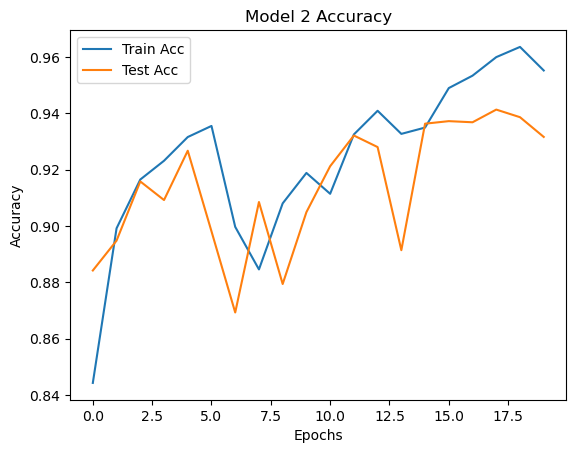

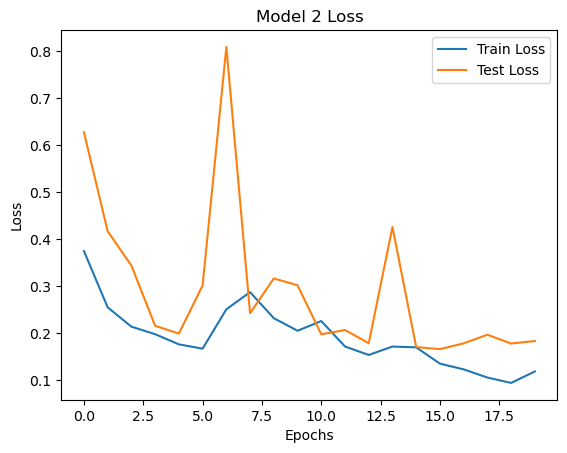

In [22]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 64, Dropout = 0.4, Optimizer = Adam)

In [23]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'Adam'

model_3 = create_model(dropout)

In [24]:
# compile model
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [25]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
782/782 [==============================] - 203s 132ms/step - loss: 0.3775 - accuracy: 0.8410 - val_loss: 0.4658 - val_accuracy: 0.8560
Epoch 2/20
782/782 [==============================] - 101s 129ms/step - loss: 0.3243 - accuracy: 0.8671 - val_loss: 0.8925 - val_accuracy: 0.8538
Epoch 3/20
782/782 [==============================] - 105s 134ms/step - loss: 0.2843 - accuracy: 0.8874 - val_loss: 0.3170 - val_accuracy: 0.8817
Epoch 4/20
782/782 [==============================] - 106s 135ms/step - loss: 0.2524 - accuracy: 0.9006 - val_loss: 0.2459 - val_accuracy: 0.8996
Epoch 5/20
782/782 [==============================] - 106s 135ms/step - loss: 0.2157 - accuracy: 0.9155 - val_loss: 0.2793 - val_accuracy: 0.9094
Epoch 6/20
782/782 [==============================] - 101s 129ms/step - loss: 0.1993 - accuracy: 0.9232 - val_loss: 0.2188 - val_accuracy: 0.9135
Epoch 7/20
782/782 [==============================] - 101s 129ms/step - loss: 0.1917 - accuracy: 0.9263 - val_loss: 0.2344 -

In [26]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.156310573220253
Train Acc: 0.9398999810218811

Test Loss: 0.19606493413448334
Test Acc: 0.9358999729156494


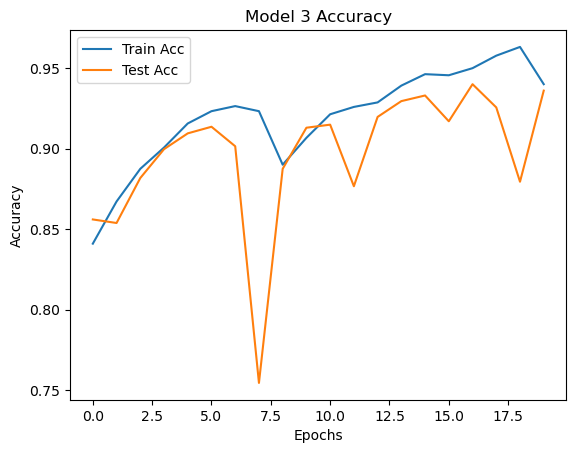

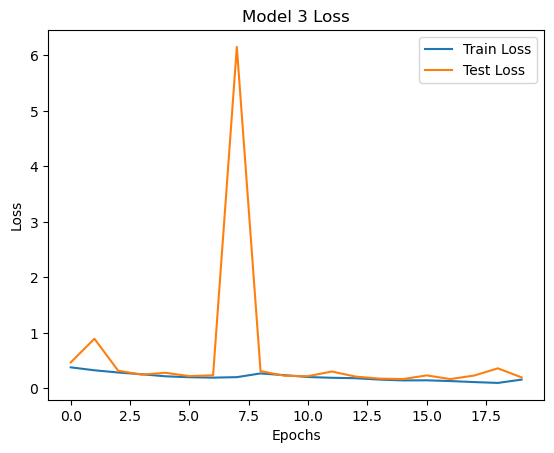

In [27]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [28]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [29]:
# compile model
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [30]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
391/391 [==============================] - 101s 146ms/step - loss: 0.5071 - accuracy: 0.7468 - val_loss: 0.4340 - val_accuracy: 0.7970
Epoch 2/20
391/391 [==============================] - 54s 139ms/step - loss: 0.3453 - accuracy: 0.8533 - val_loss: 0.3015 - val_accuracy: 0.8753
Epoch 3/20
391/391 [==============================] - 52s 132ms/step - loss: 0.2844 - accuracy: 0.8822 - val_loss: 0.2725 - val_accuracy: 0.8878
Epoch 4/20
391/391 [==============================] - 52s 134ms/step - loss: 0.2528 - accuracy: 0.8954 - val_loss: 0.2552 - val_accuracy: 0.8977
Epoch 5/20
391/391 [==============================] - 54s 137ms/step - loss: 0.2260 - accuracy: 0.9088 - val_loss: 0.2457 - val_accuracy: 0.9008
Epoch 6/20
391/391 [==============================] - 54s 138ms/step - loss: 0.1985 - accuracy: 0.9212 - val_loss: 0.2494 - val_accuracy: 0.9007
Epoch 7/20
391/391 [==============================] - 52s 133ms/step - loss: 0.1763 - accuracy: 0.9301 - val_loss: 0.3208 - val_a

In [31]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.04204516485333443
Train Acc: 0.9853399991989136

Test Loss: 0.3544485569000244
Test Acc: 0.9038000106811523


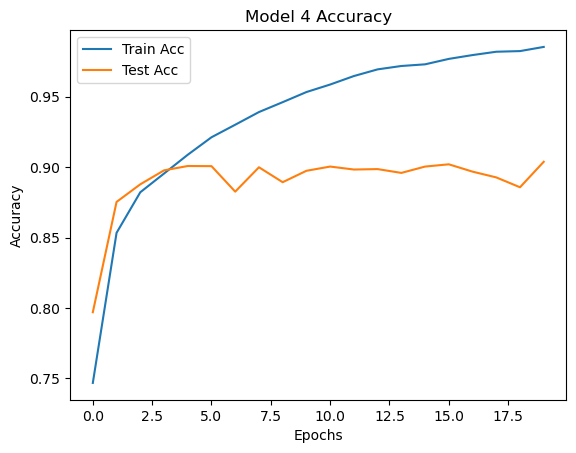

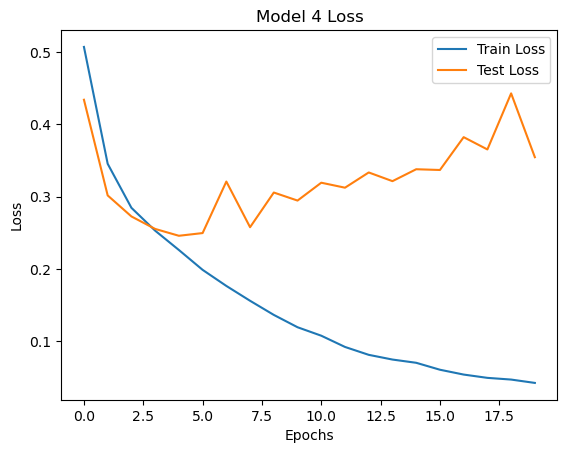

In [32]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 64, Dropout = 0, Optimizer = SGD)

In [33]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [34]:
# compile model
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [35]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
782/782 [==============================] - 141s 123ms/step - loss: 0.4461 - accuracy: 0.7868 - val_loss: 0.3654 - val_accuracy: 0.8374
Epoch 2/20
782/782 [==============================] - 99s 126ms/step - loss: 0.3063 - accuracy: 0.8703 - val_loss: 0.2842 - val_accuracy: 0.8803
Epoch 3/20
782/782 [==============================] - 95s 121ms/step - loss: 0.2695 - accuracy: 0.8879 - val_loss: 0.2716 - val_accuracy: 0.8888
Epoch 4/20
782/782 [==============================] - 98s 125ms/step - loss: 0.2435 - accuracy: 0.8980 - val_loss: 0.2661 - val_accuracy: 0.8937
Epoch 5/20
782/782 [==============================] - 99s 126ms/step - loss: 0.2199 - accuracy: 0.9108 - val_loss: 0.2738 - val_accuracy: 0.8883
Epoch 6/20
782/782 [==============================] - 99s 127ms/step - loss: 0.1952 - accuracy: 0.9214 - val_loss: 0.2956 - val_accuracy: 0.8885
Epoch 7/20
782/782 [==============================] - 94s 121ms/step - loss: 0.1736 - accuracy: 0.9302 - val_loss: 0.3311 - val_a

In [36]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.04554002359509468
Train Acc: 0.9830999970436096

Test Loss: 0.8826951384544373
Test Acc: 0.7742000222206116


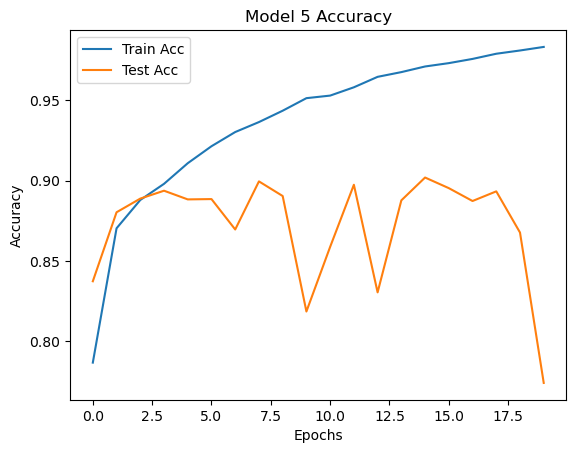

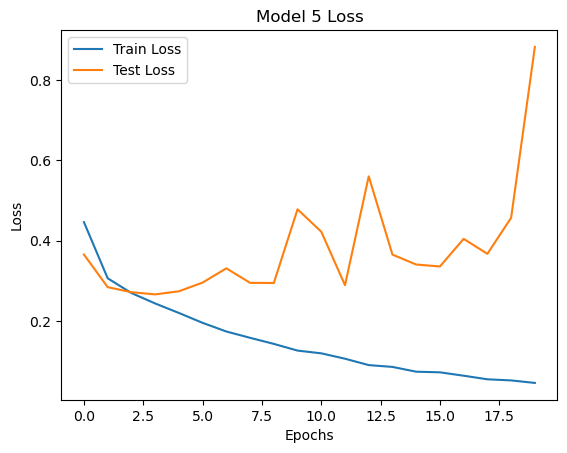

In [37]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 64, Dropout = 0.4, Optimizer = SGD)

In [38]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'SGD'

model_6 = create_model(dropout)

In [39]:
# compile model
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [40]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
782/782 [==============================] - 145s 131ms/step - loss: 0.4647 - accuracy: 0.7802 - val_loss: 0.3407 - val_accuracy: 0.8564
Epoch 2/20
782/782 [==============================] - 100s 127ms/step - loss: 0.3178 - accuracy: 0.8674 - val_loss: 0.2775 - val_accuracy: 0.8871
Epoch 3/20
782/782 [==============================] - 99s 127ms/step - loss: 0.2765 - accuracy: 0.8851 - val_loss: 0.2939 - val_accuracy: 0.8765
Epoch 4/20
782/782 [==============================] - 99s 126ms/step - loss: 0.2472 - accuracy: 0.8992 - val_loss: 0.2638 - val_accuracy: 0.8955
Epoch 5/20
782/782 [==============================] - 95s 121ms/step - loss: 0.2202 - accuracy: 0.9104 - val_loss: 0.3078 - val_accuracy: 0.8734
Epoch 6/20
782/782 [==============================] - 100s 128ms/step - loss: 0.2016 - accuracy: 0.9182 - val_loss: 0.2510 - val_accuracy: 0.8979
Epoch 7/20
782/782 [==============================] - 94s 120ms/step - loss: 0.1838 - accuracy: 0.9267 - val_loss: 0.2516 - val

In [41]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.05211624503135681
Train Acc: 0.9820799827575684

Test Loss: 0.38643932342529297
Test Acc: 0.899399995803833


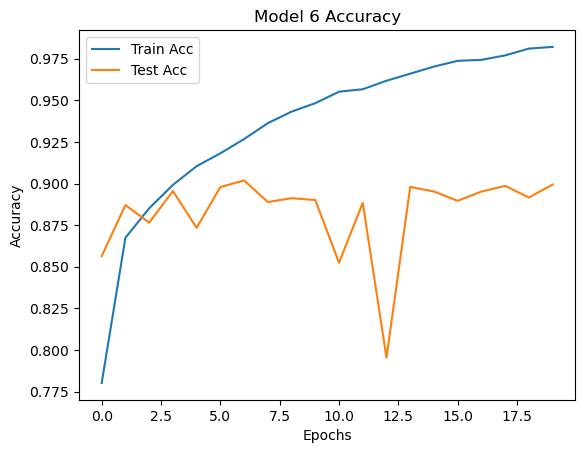

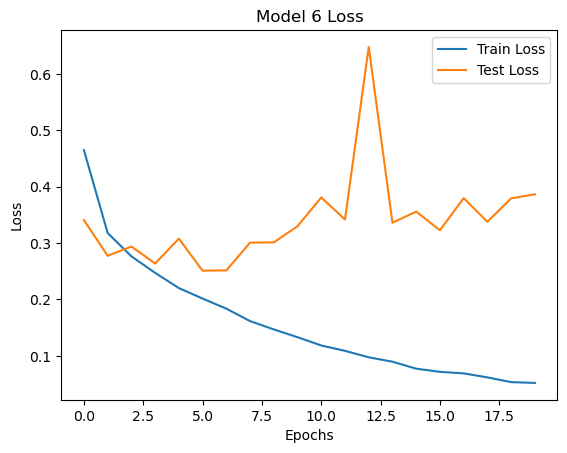

In [42]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()